# Vapor-Liquid Equilibrium for Pure Components

by Jeffrey Kantor (jeff at nd.edu)

### Summary

This [Jupyter notebook](http://jupyter.org/notebook.html) describes the modeling of vapor-liquid equilibrium with Antoine's equation, including the calculation of saturation pressure, saturation temperature, and normal boiling points.

## Gibb's Phase Rule

The Gibb's phase rule shows how many independent intensive thermodynamic variables (e.g. $T$, $P$, $\hat{V}$, or $x_i$) are required to completely specify the state of a substance.

$$ F = C + 2 - \Pi - r$$

where

$$
\begin{align*}
F & = \mbox{Thermodynamic Degrees of Freedom} \\
C & = \mbox{Number of Components} \\
\Pi & = \mbox{Number of Phases} \\
r & = \mbox{number of independent reactions at equilibrium}
\end{align*}
$$

This simple rule that has profound implications for engineering analysis.

## Phase Diagram for a Pure Component

For a pure component (i.e., $C = 1$) and no reactions (i.e., $r=0$), the Gibb's phase rule reads

$$ F = 3-\Pi$$

which shows:

* Two independent thermodynamic variables, such as $T$ and $P$, are sufficient to specify the state of a single phase.
* If two phases are in coexistence, then there must be a relationship between $T$ and $P$.
* The coexistence of three phases completely specifies the thermodynamic state.

These observations are demonstrated in a 2-dimensional phase diagram for a pure substance.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Phase-diag2.svg/500px-Phase-diag2.svg.png)  
[By Matthieumarechal, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=4623701)

The green line shows the solid/liquid coexistence (the dashed green line showing the anomolous special case of water).

### Triple Point

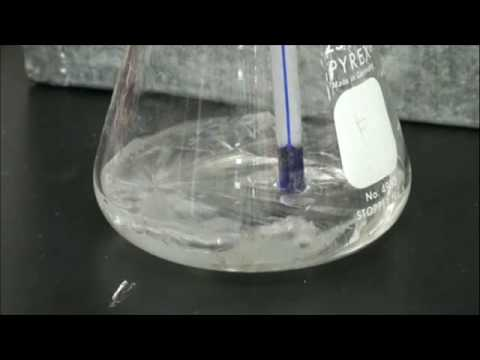

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("BLRqpJN9zeA",560,315,rel=0)

### Critical Point

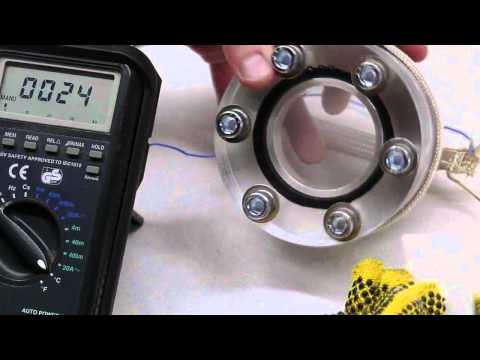

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("-gCTKteN5Y4",560,315,rel=0)

### Saturation Vapor Pressure

At a given temperature, the **saturation vapor pressure** is the pressure of a vapor when in equilibrium with the liquid phase. 

By itself, the term 'vapor pressure' may refer to a component of a gaseous mixture that is not in equilibrium with a liquid. Adding the extra adjective 'saturation' makes it clear that we're referring to a vapor-liquid equilibrium.

## Clausius-Clapeyron Equation

The Clapeyron equation is a relationship between the saturation vapor pressure of a pure substance and absolute temperature $T$.

\begin{equation}
\frac{dP^{sat}}{dT} = \frac{\Delta\hat{H}_v}{T(\hat{V}_g - \hat{V}_l)}
\end{equation}

where $\Delta\hat{H}_v$ is the latent heat of vaporization. This is the amount of heat needed to vaporize one mole of the substance in a constant pressure environment.

This equation is derived by comparing the change in free energy of the liquid phase compared to the free energy of the vapor phase. The changes must be equal for the two phases to remain in equilibrium which leads to this equation.

**Suggested Study Exercise:** *Compare the units on the left and right hand sides of this equation. Convince yourself they are the same.*

Under typical process conditions, the molar volume of vapor is much larger than the molar volume of liquid, i.e., 

\begin{equation}
\hat{V}_g \gg \hat{V}_l
\end{equation}

In turn, the molar volume of the saturated vapor can be approximated by the ideal gas law

\begin{equation}
\hat{V}_g \approx \frac{RT}{P^{sat}}
\end{equation}

Putting these together,

\begin{equation}
\frac{dP^{sat}}{dT} = \frac{P^{sat}\Delta\hat{H}_v}{RT^2}
\end{equation}

Integrating,

\begin{equation}
\int{\frac{1}{P^{sat}}dP^{sat}}
 = \int{\frac{\Delta\hat{H}_v}{RT^2}dT}
\end{equation}

Assuming $\Delta\hat{H}_v$ is independent of $T$ (which is only an approximation) gives the **Clausius-Clapeyron** equation.

Doing an indefinite integration gives

\begin{equation}
\ln{P^{sat}} = K -\frac{\Delta\hat{H}_v}{RT} 
\end{equation}

where $K$ is a constant of integration.

When integrating between specific bounds on $P$ and $T$,

\begin{equation}
\int_{P_1}^{P_2}\frac{1}{P^{sat}}\,dP^{sat}
 = \int_{T_1}^{T_2} \frac{\Delta\hat{H}_v}{RT^2}\,dT
\end{equation}

one obtains

\begin{equation}
\ln{\frac{P_2^{sat}}{P_1^{sat}}} = -\frac{\Delta\hat{H}_v}{RT}\left(\frac{1}{T_2}-\frac{1}{T_1}\right)
\end{equation}

This equation provides a useful means of estimating heats of vaporization from measurements of vapor pressure.


## Antoine's Equation

### Vapor Pressure

Antoine's equation is used to estimate the saturation pressure (also called vapor pressure) of pure substances between the triple and critical points. Louis Charles Antoine, an engineer working in the French Navy, in 1886 published the equation as method for representing the vapor pressure of water. 

A common form of the equation is

$$\log_{10}P^{sat} [mmHg]= A - \frac{B}{T[^{\circ}C] + C}$$

where pressure is units of millimeters of mercury (mmHg, also called torr), and temperature in degrees Celcius.

Compared to the Clausius-Clapeyron equation, this is an empirical expression with three parameters that can be adjusted to fit data for a variety of compounds. The algebraic structure is similar to the Clausius-Clapeyron equation, which gives considerable confidence that Antoine's equation should work well over reasonably wide temperature regimes.

** Example:** In the following cell, create a Python function to compute the vapor pressure of water in the range of 60$^\circ$C and higher. Verify by computing the vapor pressure of water at 100$^\circ$C.

In [1]:
# water (data from Appendix B.4, Felder et al.)
A = 7.96681
B = 1668.21
C = 228.0

def Psat(T):
  return 10**(A - B/(T + C))

print('Vapor pressure of water at 100C =', Psat(100.0), 'mmHg')

Vapor pressure of water at 100C = 759.98304330841 mmHg


### Saturation Temperature

An alternative form of the equation is to calculate the saturation temperature as a function of pressure

$$T^{sat}[^{\circ}C] =\frac{B}{A-\log_{10}P[mmHg]} - C$$

Values for the constants $A$, $B$, and $C$ are tabulated in various references, including the NIST Chemistry Webbook. The values of the constants depend on the units used for pressure and temperature, and whether the logarithm is computed for base $e$ or base 10. 

**Example:** On a given day, the air pressure at the Denver airport is 623 mmHg. What is the boiling point of water at that pressure?

In [4]:
from math import log10

A = 7.96681
B = 1668.21
C = 228.0

def Tsat(P):
    return B/(A - log10(P)) - C
  
print('Boiling point of water at 623mmHg =', Tsat(623.0), 'deg C')

Boiling point of water at 623mmHg = 94.52632667664744 deg C


### Working with Wide Temperature Ranges

Standard practice is to specify a range of temperatures over which a particular set of constants is known to offer an accurate representation. Multiple ranges may be pieced together to obtain saturation pressure over wider ranges.

**Example:** Create a python function `Psat` to compute the vapor pressure of water from the triple point to the critical point, and use it to create a corresponding plot.

In [ ]:
# Antoine's equation for water from 1 to 374 degrees C

def Psat(T):
  if (1 <= T < 100):
    return 10**(8.07131 - 1730.63/(T + 233.426))
  elif (100 <= T <= 374):
    return 10**(8.14019 - 1810.94/(T + 244.485))
  else:
    return float('nan')

The following code uses the `numpy` and `matplotlib.pyplot` libraries to create the requested plot.

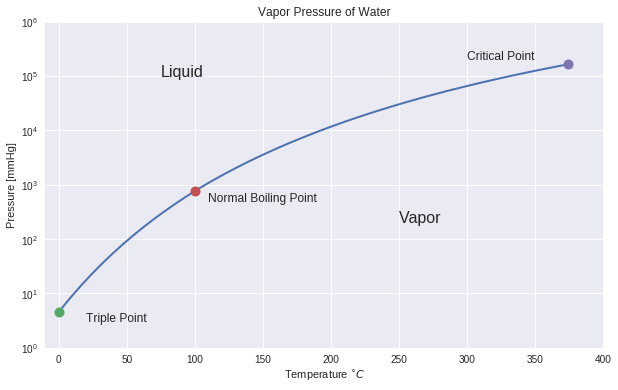

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Use Psat(T) to construct to show the vapor-liquid equilibrium diagram
T = np.linspace(1,374)
plt.figure(figsize = (10,6))
plt.semilogy(T,[Psat(T) for T in T],linewidth=2)
plt.xlabel('Temperature $^{\circ}C$')
plt.ylabel('Pressure [mmHg]')
plt.title('Vapor Pressure of Water')

# Additional annotations
plt.semilogy(0.01,4.58,'o',markersize=10)
plt.annotate('Triple Point', xy=(10,4.58), xytext=(20,3))
plt.semilogy(100,760,'o',markersize=10)
plt.annotate('Normal Boiling Point', xy=(100,760), xytext=(110,500))
plt.semilogy(374,1.67e5,'o',markersize=10)
plt.annotate('Critical Point', xy=(374,1.67e5), xytext=(300,2e5))
plt.text(250,200,'Vapor',fontsize=16)
plt.text(75,100000,'Liquid',fontsize=16)
plt.ylim([1,1000000])
plt.xlim([-10,400]);

**Example:** The catapults on aircraft carriers require steam at 520 psig. What is the minimum operating temperature?

In [17]:
# convert pressure to absolute mmHg
P = 520             # psig
P = 520 + 14.696    # convert psig -> psia
P = P*760/14.696    # convert psig -> mmHg

# function to solve
def f(T):
  return Psat(T) - P

# import a root-finding algorithm, provide initial guess
from scipy.optimize import fsolve
T = fsolve(f,200)

print("Operating Pressure =", P, "mmHg")
print("Minimum Operating Temperature =", T, "deg C")

Operating Pressure = 27651.671203048452 mmHg
Minimum Operating Temperature = [245.16090162] deg C


## Normal Boiling Points

The **normal boiling point** of a pure component is the temperature at which the saturation vapor pressure is equal to one atmosphere.  In other words, it is the saturation temperature corresponding to a pressure of one atmosphere.

Not every species will have a normal boiling point. For example, if the pressure at the triple point is above one atmosphere, then at one atmosphere  the species will sublime directly from the solid phase to vapor phase without boiling. Carbon dioxide is one example of such a compound.

**Example:** Propylene glycol is a commonly used heat transfer fluid for industrial applications. What is the normal boiling point of propylene glycol?

**Solution:** The Antoine coefficients are available on the [NIST Webbook entry for propylene glycol](https://webbook.nist.gov/cgi/cbook.cgi?ID=C57556&Mask=4&Type=ANTOINE&Plot=on). NIST, however, reports constants for the case where temperature is in Kelvin (K) and pressure in bar.



In [26]:
# propylene glycol (pressure in bar, temperature in K)

A = 6.07936
B = 2692.187
C = -17.94

from math import log10

def Tsat(P):
  P = 1.01325*P/760         # convert to pressure from mmHg
  T = B/(A - log10(P)) - C  # compute temperature in K
  T = T - 273.15            # convert temperature from K to C
  return T

print('Normal boiling point of propylene glycol =', Tsat(760), 'deg C')

Normal boiling point of propylene glycol = 188.04733800941904 deg C


**Example:** What is the saturation pressure of water at the normal boiling point of propylene glycol. Why do you think it might be preferred to water?

**Solution:** The advantage of propylene glycol as a heat transfer fluid is that it can be used for transfering heat in the range from 100C to 188C without the need for handling fluids under pressure.



In [27]:
# Antoine's equation for water from 1 to 374 degrees C

def Psat(T):
  if (1 <= T < 100):
    return 10**(8.07131 - 1730.63/(T + 233.426))
  elif (100 <= T <= 374):
    return 10**(8.14019 - 1810.94/(T + 244.485))
  else:
    return float('nan')
  
P = 14.696*(Psat(188.05)/760 - 1)

print('Saturation pressure of water at 188.05C = ', P, 'psig')

Saturation pressure of water at 188.05C =  158.99201785868928 psig
